In [34]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/maddiepellman/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices

/Users/maddiepellman/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Q1: 

In [3]:
data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/clinton1.dat', sep= '\s\s+', header=None, names= ['County Name','Percent voting for Clinton in 1992','Median Age','Mean Savings($)','PerCapita Income  ($)', 'Percent in Poverty', 'Percent Veterans', 'Percent Female','Population Density','Percent in Nursing Homes', 'Crime Index (Per capita)'], index_col = ['County Name'], engine = 'python')
data

,Percent voting for Clinton in 1992,Median Age,Mean Savings($),PerCapita Income ($),Percent in Poverty,Percent Veterans,Percent Female,Population Density,Percent in Nursing Homes,Crime Index (Per capita)
County Name,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51


Q2: Predict percentVoting on all regressors. One of the fields in the data is “Percent voting for Clinton in 1992”; let’s call it percentVoting. Regress percentVoting on all available regressors. Which two regressors
have the worst p-values?

In [8]:
df1 = data.rename(columns = {'Percent voting for Clinton in 1992':'percentVoting'})

y, X = dmatrices("percentVoting ~ Q('Median Age') + Q('Mean Savings($)') + Q('PerCapita Income  ($)') + Q('Percent in Poverty') + Q('Percent Veterans') + Q('Percent Female') + Q('Population Density') + Q('Percent in Nursing Homes') + Q('Crime Index (Per capita)')", data=df1, return_type='dataframe')

model = sm.OLS(y, X)       # Set up the model
result = model.fit() 

#get the results
result.pvalues.sort_values(ascending = False)[:2]



Q('Median Age')                  0.238619
Q('Crime Index (Per capita)')    0.141950
dtype: float64

Q3: A formula-creating function. Write a function called formula that takes a list of regressors as input, and outputs the formula for regressing percentVoting on these regressors. For example, formula([’age’, ’savings’]) should output percentVoting ∼ age + savings.

In [9]:
def formula(regressors):
    
    string_to_pass = "percentVoting ~ "
    for i in range(len(regressors)): 
        #for last item in list, don't add a plus sign
        if i == (len(regressors)-1):
            string_to_pass = string_to_pass + "Q('" + regressors[i] + "')"
        else:
            string_to_pass = string_to_pass + "Q('" + regressors[i] + "') + "
            

    

    #get line to return 
    return string_to_pass

test = ['age','savings','income']

teststring = formula(test)
print(teststring)


percentVoting ~ Q('age') + Q('savings') + Q('income')


Q4: R-squared computation function. Write a function called rsquared that, given a list of regressors, returns the R-squared corresponding to a regression of percentVoting with respect to the list of regressors. You can use the formula function you wrote above.

In [10]:
def rsquared(regressors):
    
    string = formula(regressors)
    
    #create design matrix
    y, X = dmatrices(string, data=df1, return_type='dataframe')
    
    model = sm.OLS(y, X)       # Set up the model
    results = model.fit() 
    
    return results.rsquared


test = ['Percent in Poverty','Population Density']

print("R-Squared Value")
print(rsquared(test))
    
    

R-Squared Value
0.285829802291


Q5: Find the next best regressor. Write a function called bestnextregressor that, given a list of regressors (called current regressor list) and the list of all possible regressors (called all regressors list), picks one regressor from all regressors list that, when combined with the regressors in current regressor list, yields the highest R-square. The function should return this regressor, and the corresponding R-square.

In [11]:
def no_overlaps(current,all_):
    
    for item in current:
        if item in all_:
            all_.remove(item)
    return all_
        

def bestnextregressor(current_regressor_list, all_regressors_list):
    
    #find unique regressors 
    
    best_regressor = ''
    max_r_square = 0.000000000000000000000000000003
    
    regressors_to_compare = no_overlaps(current_regressor_list, all_regressors_list)
    
    for item in regressors_to_compare:
        
        current_regressor_list.append(item)
        
        #call r_square
        temp_r_square = rsquared(current_regressor_list)
        
        #check if max
        if temp_r_square > max_r_square:
            best_regressor = item
            max_r_square = temp_r_square
            
        current_regressor_list.remove(item)
        
            
    return (best_regressor,max_r_square)
            
    
#test function

current_regressor_list = ['Percent in Poverty','Median Age']
all_regressor_list = ['Median Age', 'Mean Savings($)', 'PerCapita Income  ($)', 'Percent in Poverty', 'Percent Veterans','Percent Female','Population Density','Percent in Nursing Homes','Crime Index (Per capita)']

print(bestnextregressor(current_regressor_list, all_regressor_list)[0])
print(bestnextregressor(current_regressor_list, all_regressor_list)[1])
        
        
        
        
        
        
    
    

Population Density
0.287099059947


Q6: Pick the k best regressors. Write a function called best regressors that takes two arguments:
• num regressors, which is the number of regressors we want, and
• all regressors list, which again is the list of all possible regressors.
The function should compute the best num regressors  by picking them one at a time using best next regressor that you wrote above. The function should return a tuple of the following items:
• a list of the best regressors, in the order in which they were picked, and
• the corresponding R-square values.
In other words, you want a list of the results of calling best next regressor.

In [24]:
def bestregressors(num_regressors,all_regressors_list):
    
    current_reg_list = []
    r_square_values = []
    num_rounds = 0

    while (num_rounds < num_regressors):
        
        tuple_reg = bestnextregressor(current_reg_list,all_regressors_list)
        current_reg_list.append(tuple_reg[0])
        r_square_values.append(tuple_reg[1])
        
#         print(current_reg_list)
        num_rounds += 1
        
    return (current_reg_list,r_square_values)

#testing my function
all_regressor_list = ['Median Age', 'Mean Savings($)', 'PerCapita Income  ($)', 'Percent in Poverty', 'Percent Veterans','Percent Female','Population Density','Percent in Nursing Homes','Crime Index (Per capita)']
result_best_regressor = bestregressors(3,all_regressor_list)

print('List of Best Regressors (In the Order Picked) and Corresponding R_Squared Values')
print(result_best_regressor[0])
print(result_best_regressor[1])

    
    

List of Best Regressors (In the Order Picked) and Corresponding R_Squared Values
['Percent in Poverty', 'Population Density', 'Percent Female']
[0.25103851961631951, 0.28582980229105792, 0.30914506632485794]


Q7: Order all regressors in the best order. Run best regressors to output all available regressors in sequence. In other words, the first item in the result should be the best single regressor, the second item should be
the next best regressor that combined with the first regressor gives the best R-square, and so on.
This idea of ordering the regressors in this particular order is called for- ward selection, and is one way of selecting only a few regressors when given a large set of regressors.

In [29]:
all_regressor_list = ['Median Age', 'Mean Savings($)', 'PerCapita Income  ($)', 'Percent in Poverty', 'Percent Veterans','Percent Female','Population Density','Percent in Nursing Homes','Crime Index (Per capita)']

num_7_results = bestregressors(len(all_regressor_list),all_regressor_list)

print('Regressors Printed in Forward Selection Order:')
print('')
for item in num_7_results[0]:
    print(item)



Regressors Printed in Forward Selection Order:

Percent in Poverty
Population Density
Percent Female
Mean Savings($)
Percent Veterans
Percent in Nursing Homes
PerCapita Income  ($)
Crime Index (Per capita)
Median Age


Q8: Plot the R-squared values as regressors are added in the best order.

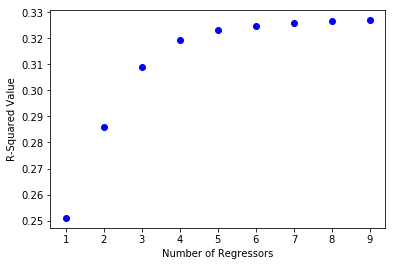

In [35]:
num_regressors = []
for i in range(len(num_7_results[0])):
    num_regressors.append(i+1)

plot_series = pd.Series(data=num_7_results[1],index=num_regressors)
plot_series

plot(plot_series.index.values, plot_series.values, marker='o', color='blue', linestyle='None')
xlabel('Number of Regressors')
ylabel('R-Squared Value')

show()

Q9: Create a classification target. Attach a new column, called target to the DataFrame, whose value for each row is either 1 (if percentVoting is at least 40.0), or 0 (percentVoting is less than 40.0).


In [36]:
#create new target column
df1['target'] = 0.0

#create mask 
mask = df1['percentVoting'] >= 40.0
df1.loc[mask, 'target'] = 1.0

df1

,percentVoting,Median Age,Mean Savings($),PerCapita Income ($),Percent in Poverty,Percent Veterans,Percent Female,Population Density,Percent in Nursing Homes,Crime Index (Per capita),target
County Name,,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,0.0
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,0.0
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,1.0
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,0.0
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,1.0
"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266,1.0
"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560,0.0
"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218,1.0
"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51,1.0


Q10: Create training and test sets. Create design matrices for predicting the target using just the two features poverty and popdensity. Split this into design matrices for training and testing datasets, with 70% data being used for training, and 30% for testing.

Text(0,0.5,u'Population Density')

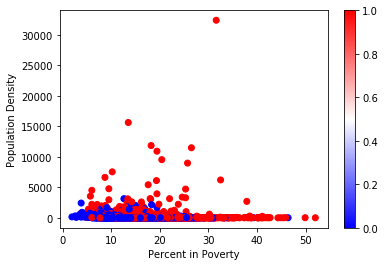

In [62]:
Y, X = dmatrices('target ~ 0 + Q("Percent in Poverty") + Q("Population Density")', df1,return_type="dataframe")

y = Y['target'].values


from sklearn.model_selection import train_test_split

#random_state parameter just ensures we get the same random split each time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

y_train[:5]

sc = scatter(df1['Percent in Poverty'], df1['Population Density'], c=y, cmap='bwr')
colorbar(sc)
xlabel('Percent in Poverty')
ylabel('Population Density')



# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [48]:
# y = Y['target'].values

# from sklearn.model_selection import train_test_split

# #random_state parameter just ensures we get the same random split each time
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# y_train[:5]
# # print(X_test)

# #why does xtest have all the varaiables and not just the features we tested on? 
# # print(len(y_train))

array([ 0.,  1.,  1.,  0.,  1.])

Q11: Accuracy of classification. Use a K-nearest neighbors classifier to predict the target using the two given features, using 1, 3, 5, 10, 20, 50, 100, and 1000 nearest neighbors respectively. Print out the training and test ac-
curacy for each of these.

In [68]:
from sklearn import neighbors
from sklearn import metrics

numbers = [1,3,5,10,20,50,100,1000]

#do the training data first 
for num in numbers: 
    model = neighbors.KNeighborsClassifier(n_neighbors=num, weights='uniform', p=2)
    model.fit(X_train, y_train)
    
    predicted_classes_training = model.predict(X_train)
    predicted_classes_testing = model.predict(X_test)
    
    print(str(num) + '-Nearest Neighbors Accuracies:')
    training_score = metrics.accuracy_score(y_train, predicted_classes_training)
    print "Training score: " + str(training_score)
    testing_score = metrics.accuracy_score(y_test, predicted_classes_testing)
    print "Testing score: " + str(testing_score)
    print 


1-Nearest Neighbors Accuracies:
Training score: 0.997885835095
Testing score: 0.600985221675

3-Nearest Neighbors Accuracies:
Training score: 0.788054968288
Testing score: 0.635467980296

5-Nearest Neighbors Accuracies:
Training score: 0.748414376321
Testing score: 0.630541871921

10-Nearest Neighbors Accuracies:
Training score: 0.720401691332
Testing score: 0.646551724138

20-Nearest Neighbors Accuracies:
Training score: 0.690274841438
Testing score: 0.658866995074

50-Nearest Neighbors Accuracies:
Training score: 0.683932346723
Testing score: 0.662561576355

100-Nearest Neighbors Accuracies:
Training score: 0.677589852008
Testing score: 0.663793103448

1000-Nearest Neighbors Accuracies:
Training score: 0.567124735729
Testing score: 0.576354679803



Q12: Plots and reasons. Show a scatter plot of popdensity versus poverty, and color the points according to the target (i.e., each point in the scatter plot represents a county, and the color of the county depends on the value of target for that county). Can you interpret the plot? What types of counties voted for Bill Clinton?

Text(0.5,1,u'Population Density Versus Poverty: Factors Affecting Clinton Voting Percentages')

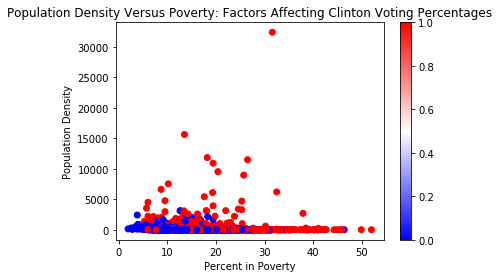

In [61]:
sc = scatter(df1['Percent in Poverty'], df1['Population Density'], c=y, cmap='bwr')
colorbar(sc)
xlabel('Percent in Poverty')
ylabel('Population Density')
title('Population Density Versus Poverty: Factors Affecting Clinton Voting Percentages')

In the plot, a red dot means that over 40% of the voters in that country voted for Bill Clinton. What I am interpreting from this graph is that the higher density and higher poverty levels, for the most part, indicate that more than 40% of the county voted for Clinton. 